In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape,test.shape

((42000, 785), (28000, 784))

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X,y = train.iloc[:,1:].values.astype('float32'),train.iloc[:,0].values.astype('int32')
test = test.values.astype('float32') 

0

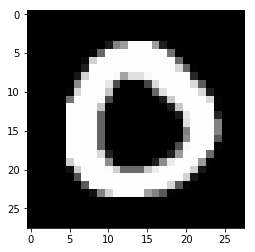

In [6]:
val =4
a = X[val].reshape(28,28)   
plt.imshow(a,cmap='gray')
y[val]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)
X_train = X_train/255
X_test = X_test/255    

In [8]:
test = test/255

In [9]:
X_train.shape,X_test.shape

((40320, 784), (1680, 784))

In [97]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)  

In [11]:
test = test.reshape(-1,28,28,1)

In [98]:
X_train.shape

(37800, 28, 28, 1)

In [14]:
import keras

/home/hdsingh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [101]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [16]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [17]:
batches = gen.flow(X_train,y_train,batch_size=64)
val_batches = gen.flow(X_test,y_test,batch_size=64)

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras import optimizers
from keras import losses

In [19]:
model = Sequential()

In [20]:
model.add(Dense(units = 64,activation = 'tanh',input_shape = (X_train.shape[1:])))
model.add(Flatten())
model.add(Dense(units = 32,activation = 'relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
optimizer = optimizers.RMSprop()

In [22]:
model.compile(optimizer=optimizer,
             loss = losses.categorical_crossentropy,
             metrics = ['accuracy'])

In [23]:
# model.summary()

Acc:0.9224

## Convolutional Model

In [24]:
from keras.layers import Convolution2D, MaxPooling2D

In [25]:
model = Sequential()

In [26]:
model.add(Convolution2D(input_shape = (X_train.shape[1:]),filters=128,kernel_size=(3,3),activation='relu'))
model.add(Convolution2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(48,(3,3),activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [27]:
optimizer = optimizers.Adam()
model.compile(optimizer=optimizer,
             loss = losses.categorical_crossentropy,
             metrics = ['accuracy'])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 48)        27696     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                76864     
__________

## Convolutional With Batch Normalisation

In [40]:
from keras.layers.normalization import BatchNormalization

In [41]:
model = Sequential()

In [42]:
model.add(Convolution2D(input_shape = (X_train.shape[1:]),filters=128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(Convolution2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D())
model.add(Convolution2D(48,(3,3),activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(Dense(10,activation='softmax'))

In [46]:
optimizer = optimizers.Adam()
model.compile(optimizer=optimizer,
             loss = losses.categorical_crossentropy,
             metrics = ['accuracy'])

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 128)       104       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        96        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 48)        27696     
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 48)        40        
__________

In [48]:
history = model.fit_generator(batches,
                    steps_per_epoch=batches.n,
                    epochs = 1,validation_data = val_batches)

Epoch 1/1
40320/40320 [==============================] - 784s 19ms/step - loss: 0.0065 - acc: 0.9981 - val_loss: 0.0446 - val_acc: 0.9929


{'acc': [0.9980538504464286],
 'loss': [0.006540488900378172],
 'val_acc': [0.9928571428571429],
 'val_loss': [0.04461321641187429]}

In [61]:
history = model.fit_generator(batches,
                    steps_per_epoch=batches.n,
                    epochs = 2,validation_data = val_batches)

Epoch 1/2
40320/40320 [==============================] - 761s 19ms/step - loss: 6.0586e-04 - acc: 0.9998 - val_loss: 0.0346 - val_acc: 0.9899
Epoch 2/2
40320/40320 [==============================] - 747s 19ms/step - loss: 3.5113e-04 - acc: 0.9999 - val_loss: 0.0615 - val_acc: 0.9911


In [49]:
res = model.predict_classes(test)

3

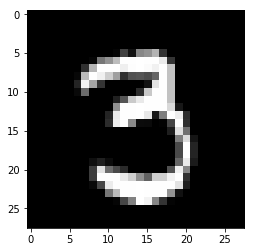

In [51]:
val = 1466
a = test[val].reshape(28,28)
plt.imshow(a,cmap='gray')
res[val]

In [54]:
pred = pd.DataFrame({'ImageId':[i for i in range(1,len(res)+1)],"label":list(res) },index=None)

In [56]:
pred.to_csv('sub3.csv',index = False)

In [60]:
history.history

{'acc': [0.9980538504464286],
 'loss': [0.006540488900378172],
 'val_acc': [0.9928571428571429],
 'val_loss': [0.04461321641187429]}

### Data Augmentation

#### Attempt 1

In [62]:
gen = image.ImageDataGenerator(featurewise_center=True,
                                featurewise_std_normalization=True,
                               rotation_range=8, width_shift_range=0.1, shear_range=0.3,
                               height_shift_range=0.1, zoom_range=0.08)
gen.fit(X_train)
batches = gen.flow(X_train, y_train, batch_size=64)

val_gen = image.ImageDataGenerator()
val_batches = val_gen.flow(X_test, y_test, batch_size=64)

In [63]:
model = Sequential()
model.add(Convolution2D(input_shape = (X_train.shape[1:]),filters=128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(Convolution2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D())
model.add(Convolution2D(48,(3,3),activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(Dense(10,activation='softmax'))


optimizer = optimizers.Adam()
model.compile(optimizer=optimizer,
             loss = losses.categorical_crossentropy,
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 128)       104       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 64)        96        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 48)        27696     
_________________________________________________________________
batch_normalization_7 (Batch (None, 10, 10, 48)        40        
__________

In [64]:
history = model.fit_generator(batches,
                    steps_per_epoch=batches.n,
                    epochs = 1,validation_data = val_batches)

Epoch 1/1
40320/40320 [==============================] - 764s 19ms/step - loss: 0.0211 - acc: 0.9934 - val_loss: 14.5267 - val_acc: 0.0976


In [65]:
res = model.predict_classes(test)
pred = pd.DataFrame({'ImageId':[i for i in range(1,len(res)+1)],"label":list(res) },index=None)
pred.to_csv('sub4.csv',index = False)

#### Attempt 2

In [91]:
from keras.datasets import mnist

In [92]:
(keras_x_train, keras_y_train),(keras_x_test, keras_y_test) = mnist.load_data()

In [93]:
keras_x_train.shape,keras_y_train.shape,keras_x_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28))

In [94]:
keras_x_train = keras_x_train.astype('float32').reshape(-1,28,28,1)
keras_x_train = keras_x_train/255
keras_y_train = keras_y_train.astype('int32')
keras_x_test = keras_x_test.astype('float32').reshape(-1,28,28,1)
keras_x_test = keras_x_test/255
keras_y_test = keras_y_test.astype('int32')
keras_y_train = keras.utils.to_categorical(keras_y_train, num_classes=10)
keras_y_test = keras.utils.to_categorical(keras_y_test, num_classes=10)

In [95]:
keras_x_train[0].shape,keras_y_test.shape

((28, 28, 1), (10000, 10))

In [ ]:
X_train = np.concatenate((X_train,keras_x_train,keras_x_test),axis = 0)

In [102]:
y_train = np.concatenate((y_train,keras_y_train,keras_y_test),axis = 0)

In [103]:
X_train.shape,y_train.shape

((107800, 28, 28, 1), (107800, 10))

In [104]:
model = Sequential()
model.add(Convolution2D(input_shape = (X_train.shape[1:]),filters=128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(Convolution2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D())
model.add(Convolution2D(48,(3,3),activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization(axis = 1))
model.add(Dense(10,activation='softmax'))

optimizer = optimizers.Adam()
model.compile(optimizer=optimizer,
             loss = losses.categorical_crossentropy,
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 128)       104       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        73792     
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 64)        96        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 48)        27696     
_________________________________________________________________
batch_normalization_11 (Batc (None, 10, 10, 48)        40        
__________

In [106]:
history = model.fit(X_train,y_train,epochs=2,batch_size=2048)

Epoch 1/2
107800/107800 [==============================] - 26s 239us/step - loss: 0.0706 - acc: 0.9837
Epoch 2/2
107800/107800 [==============================] - 26s 240us/step - loss: 0.0427 - acc: 0.9905


In [107]:
history = model.fit(X_train,y_train,epochs=2,batch_size=2048)

Epoch 1/2
107800/107800 [==============================] - 26s 241us/step - loss: 0.0303 - acc: 0.9933
Epoch 2/2
107800/107800 [==============================] - 26s 243us/step - loss: 0.0222 - acc: 0.9953


In [108]:
history = model.fit(X_train,y_train,epochs=4,batch_size=2048)

Epoch 1/4
107800/107800 [==============================] - 26s 240us/step - loss: 0.0169 - acc: 0.9967
Epoch 2/4
107800/107800 [==============================] - 26s 244us/step - loss: 0.0130 - acc: 0.9980
Epoch 3/4
107800/107800 [==============================] - 26s 244us/step - loss: 0.0099 - acc: 0.9987
Epoch 4/4
107800/107800 [==============================] - 26s 241us/step - loss: 0.0075 - acc: 0.9993


In [109]:
res = model.predict_classes(test)
pred = pd.DataFrame({'ImageId':[i for i in range(1,len(res)+1)],"label":list(res) },index=None)
pred.to_csv('sub5.csv',index = False)

In [110]:
history = model.fit(X_train,y_train,epochs=2,batch_size=2048)

Epoch 1/2
107800/107800 [==============================] - 26s 239us/step - loss: 0.0060 - acc: 0.9995
Epoch 2/2
107800/107800 [==============================] - 26s 240us/step - loss: 0.0045 - acc: 0.9997


In [111]:
res = model.predict_classes(test)
pred = pd.DataFrame({'ImageId':[i for i in range(1,len(res)+1)],"label":list(res) },index=None)
pred.to_csv('sub6.csv',index = False)

In [112]:
history = model.fit(X_train,y_train,epochs=2,batch_size=2048)

Epoch 1/2
107800/107800 [==============================] - 26s 239us/step - loss: 0.0033 - acc: 0.9999
Epoch 2/2
107800/107800 [==============================] - 26s 240us/step - loss: 0.0025 - acc: 1.0000


In [113]:
res = model.predict_classes(test)
pred = pd.DataFrame({'ImageId':[i for i in range(1,len(res)+1)],"label":list(res) },index=None)
pred.to_csv('sub7.csv',index = False)

In [114]:
history = model.fit(X_train,y_train,epochs=2,batch_size=2048)

Epoch 1/2
107800/107800 [==============================] - 26s 240us/step - loss: 0.0021 - acc: 1.0000
Epoch 2/2
107800/107800 [==============================] - 26s 241us/step - loss: 0.0017 - acc: 1.0000


In [115]:
res = model.predict_classes(test)
pred = pd.DataFrame({'ImageId':[i for i in range(1,len(res)+1)],"label":list(res) },index=None)
pred.to_csv('sub8.csv',index = False)